In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [20]:
def modelo_lineal(x, m, b):
    return x*m + b 

In [3]:
datos = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\tp_1_ej_1.txt',
    delimiter = ' ',
    decimal = '.'
    )

In [6]:
datos.head()

,T,Tiempo
0,12.5,152.0
1,16.0,105.0
2,18.0,68.0
3,19.5,53.0
4,21.0,48.0


In [8]:
datos['Tasa de desarrollo'] = 1/datos['Tiempo']
datos.head()

,T,Tiempo,Tasa de desarrollo
0,12.5,152.0,0.006579
1,16.0,105.0,0.009524
2,18.0,68.0,0.014706
3,19.5,53.0,0.018868
4,21.0,48.0,0.020833


Text(0, 0.5, 'Tasa de desarrollo')

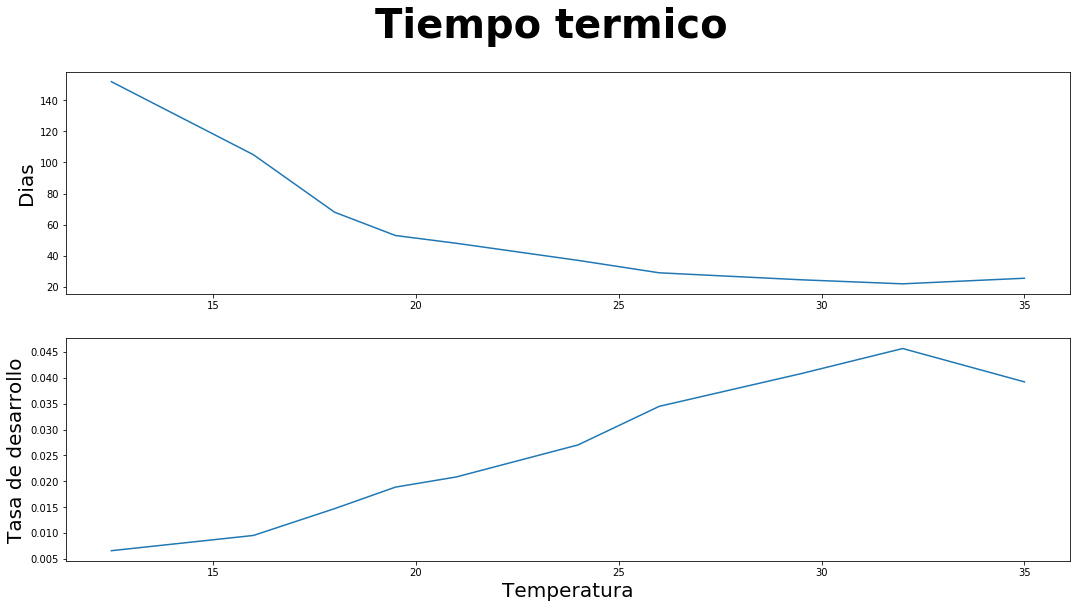

In [19]:
grafico, sub_graficos = plt.subplots(
    nrows = 2,
    figsize = (18, 9)
    )
grafico.suptitle(
    'Tiempo termico',
    fontsize = 40,
    fontweight='bold'
    )
plt.xlabel(
    'Temperatura',
    fontsize = 20
    )
sub_graficos[0].plot(
    datos['T'],
    datos['Tiempo']
    )
sub_graficos[0].set_ylabel(
    'Dias',
    fontsize = 20
    )
sub_graficos[1].plot(
    datos['T'],
    datos['Tasa de desarrollo']
    )
sub_graficos[1].set_ylabel(
    'Tasa de desarrollo',
    fontsize = 20
    )

    Se observa un aumento de la tasa de desarrollo con la temperatura hasta los 32°C. Luego comienza a decrecer. Esto es esperable, pues la velocidad de las reacciones químicas que ocurren dentro del Ostrinia nubilalis se incrementa con la temperatura hasta que las enzimas (que son proteínas) comienzan a desnaturalizarse.
    En el rango [12-16]°C, el incremento en tasa de desarrollo por unidad de temperatura es menor que en el rango [16-32]°C. Por lo tanto, ajustaría un modelo lineal sólo entre estos valores de temperatura ([16-32]°C) para estimar la temperatura base. 
    La cantidad de días necesarios para que ocurra el ciclo de vida completo se comporta en forma inversa a la tasa de desarrollo, como era de esperar, pues así se calculan.

In [31]:
x_fit = datos['T'].iloc[1:-1]
y_fit = datos['Tasa de desarrollo'].iloc[1:-1]
ajuste, covarianzas = curve_fit(
    modelo_lineal,
    x_fit,
    y_fit
    )
recta_regresion = modelo_lineal(
    x_fit,
    *ajuste
    )

Text(0, 0.5, 'Tasa de desarrollo')

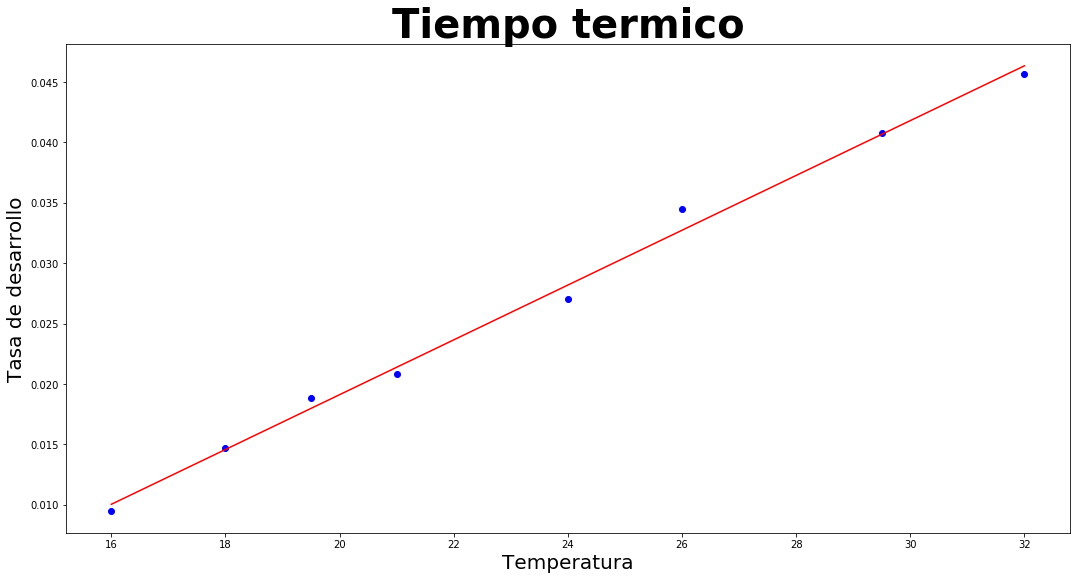

In [34]:
plt.figure(
    figsize = (18, 9),
    )
plt.plot(
    x_fit,
    y_fit,
    'bo'
    )
plt.plot(
    x_fit,
    recta_regresion,
    'r-'
    )
plt.title(
    'Tiempo termico',
    fontsize = 40,
    fontweight='bold'
    )
plt.xlabel(
    'Temperatura',
    fontsize = 20
    )
plt.ylabel(
    'Tasa de desarrollo',
    fontsize = 20
    )

In [39]:
print('Pendiente ' + str(ajuste[0]))
print('Ordenada ' + str(ajuste[1]))

Pendiente 0.0022684307541609747
Ordenada -0.02625111973893585


In [40]:
temperatura_base = -ajuste[1]/ajuste[0]
print('Temperatura base ' + str(temperatura_base))

Temperatura base 11.572369882035638


    En el modelo de unidades de calor utilizaría la temperatura óptima como tope. Para temperaturas mayores la tasa de crecimiento sería constante con este modelo.
    Consultar!

In [4]:
datos['Grados dia'] = (datos['T'] - 11.57)*datos['Tiempo']
datos.head(30)

,T,Tiempo,Grados dia
0,12.5,152.0,141.360
1,16.0,105.0,465.150
2,18.0,68.0,437.240
3,19.5,53.0,420.290
4,21.0,48.0,452.640
5,24.0,37.0,459.910
6,26.0,29.0,418.470
7,29.5,24.5,439.285
8,32.0,21.9,447.417
9,35.0,25.5,597.465


    Por qué es diferente en cada caso??